In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as lin

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-v0_8-whitegrid']) #,'data/cours.mplstyle'])

In [5]:
def arrow2D(a,b, color='k', **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))

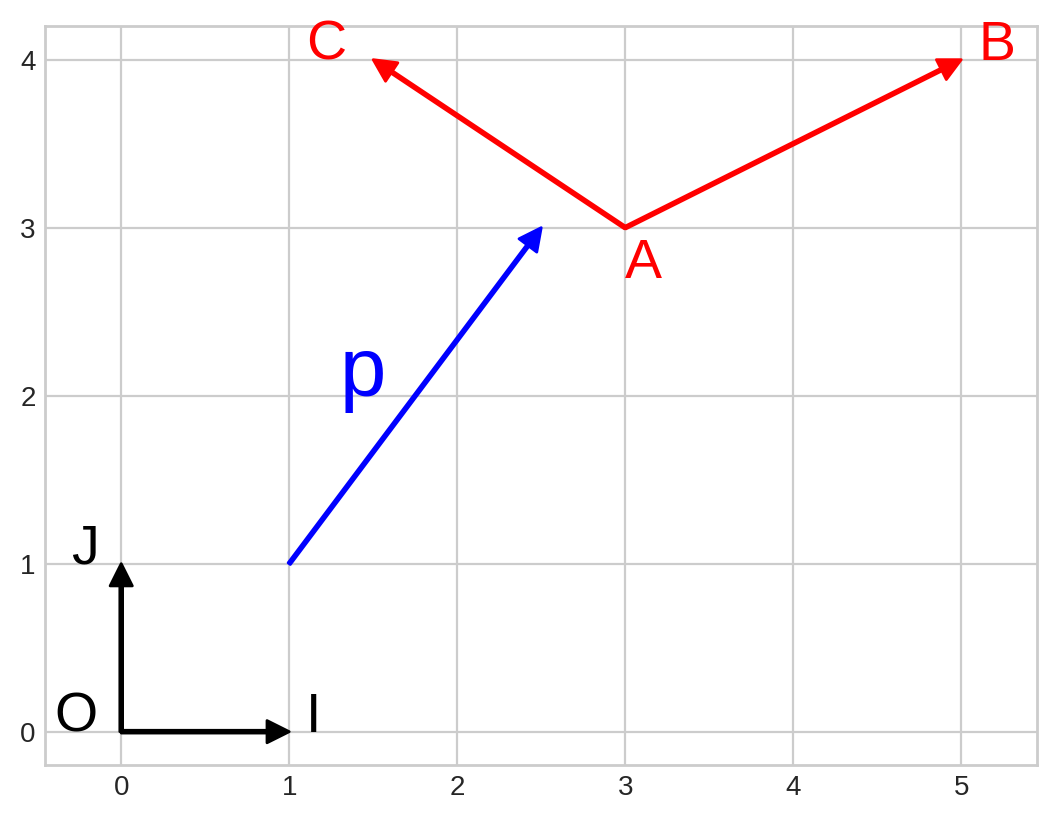

In [6]:
δx = np.array((0.1, 0))
δy = np.array((0, 0.1))

O = np.array((0,0))
I = np.array((1,0))
J = np.array((0,1))

plt.annotate("O", O - 4*δx, size=20, color='k')
plt.annotate("I", I + δx, size=20, color='k')
plt.annotate("J", J - 3*δx, size=20, color='k')

A = np.array((3,3))
B = np.array((5,4))
C = np.array((1.5,4))
plt.annotate("A", A - 3*δy, size=20, color='r')
plt.annotate("B", B + δx, size=20, color='r')
plt.annotate("C", C - 4*δx , size=20, color='r')

arrow2D(O,I)
arrow2D(O,J)
arrow2D(A,B, 'r')
arrow2D(A,C, 'r')

arrow2D([1,1], [2.5,3], 'b')
plt.annotate("p", (1.3,2), size=30, color='b')
plt.yticks(np.arange(0,5,1))
plt.axis("equal");

Mais on a vu qu'on peut intègrer la translation dans une matrice d'une dimension supérieure.

In [7]:
P = np.identity(3) # defines the size and set the last line (others will be overwritten)
P[:2, :2] = [[2, -1.5], [1, 1]]    # deformation
P[:,2] = [3,3,1]
P

array([[ 2. , -1.5,  3. ],
       [ 1. ,  1. ,  3. ],
       [ 0. ,  0. ,  1. ]])

In [8]:
def to3D(x):
    """ Transform 2D point(s) to 3D point(s) with 1 as third value """
    if type(x) == list:
        x = np.array(x)
    if len(x.shape) == 1:
        return np.array([*x,1])
    elif len(x.shape) == 2:
        return np.array([*x,np.ones(len(x[0]))])
    else:
        raise Exception('Erreur de dimension')

### Notre souris dans le nouveau repère

A quoi ressemble la souris exprimée dans le repère d'arrivée vue depuis le repère de départ.

In [9]:
mouse = np.load('mouse.npy')

On peut aussi voir la souris noire comme la transformée de la souris rouge par la matrice de passage.

Si on ajoute la translation, alors on a :

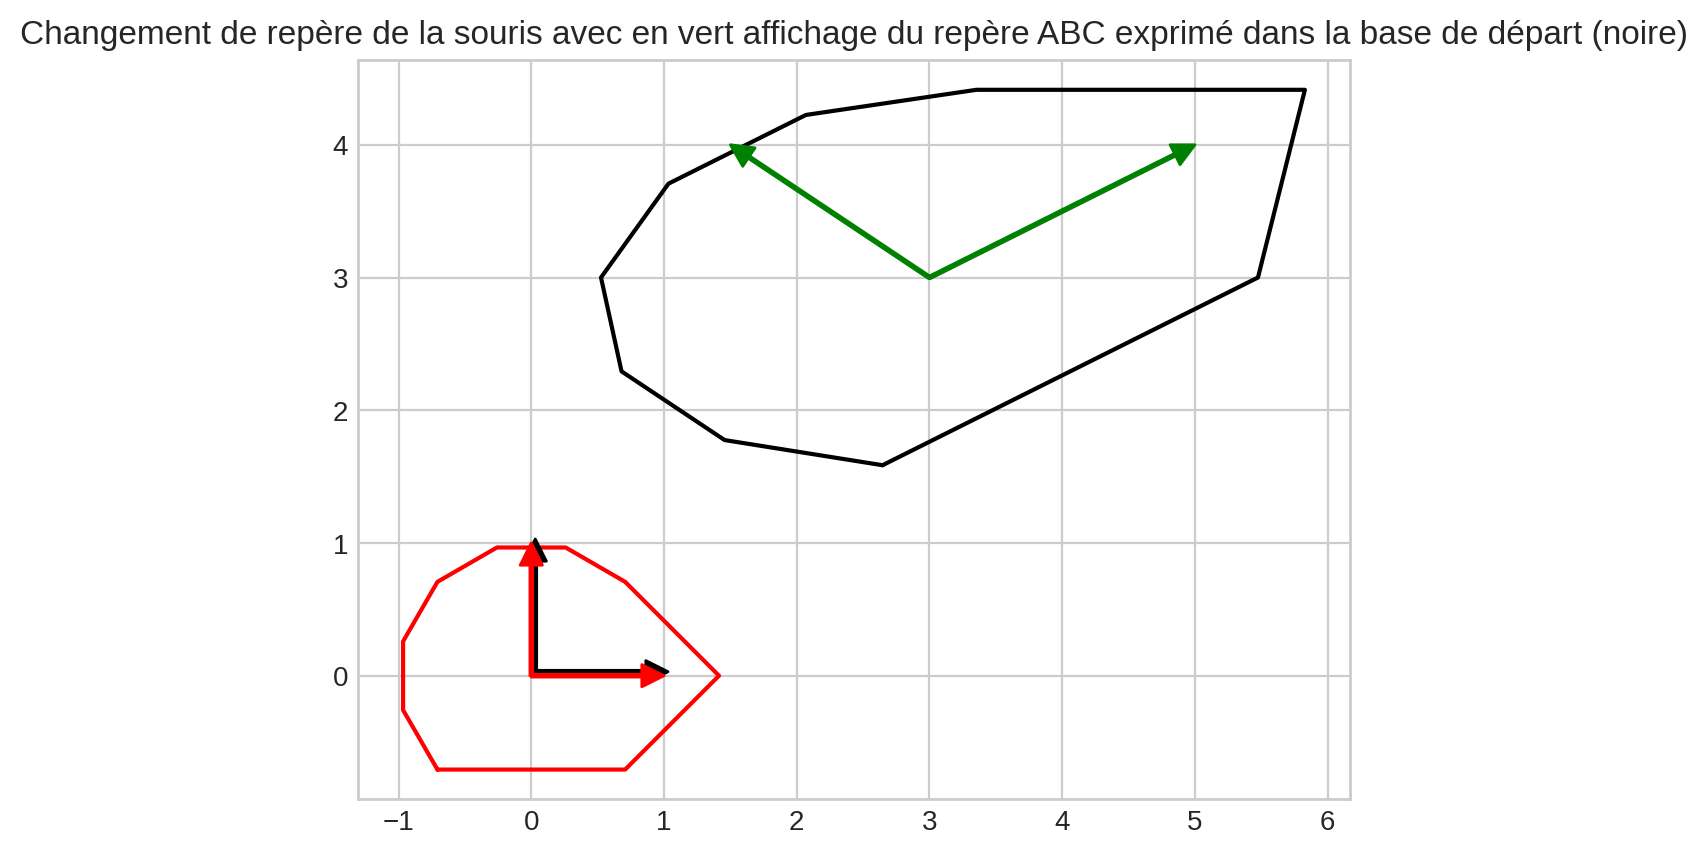

In [10]:
ε = 0.03  # pour voir les 2 repères qui sont supperposés

pmouse = P @ to3D(mouse)

arrow2D(O+ε,I+ε, 'k')
arrow2D(O+ε,J+ε, 'k')
arrow2D(O,I, 'r')
arrow2D(O,J, 'r')
arrow2D(A,B, 'g')
arrow2D(A,C, 'g')

plt.plot(mouse[0,:], mouse[1,:], 'red')
plt.plot(pmouse[0,:], pmouse[1,:], 'black')
plt.axis("equal")
plt.title('Changement de repère de la souris avec en vert affichage du repère ABC exprimé dans la base de départ (noire)');

### Exercice -- Et l'inverse ?

À quoi ressemble la souris du repère de départ vue depuis le repère d'arrivée ?

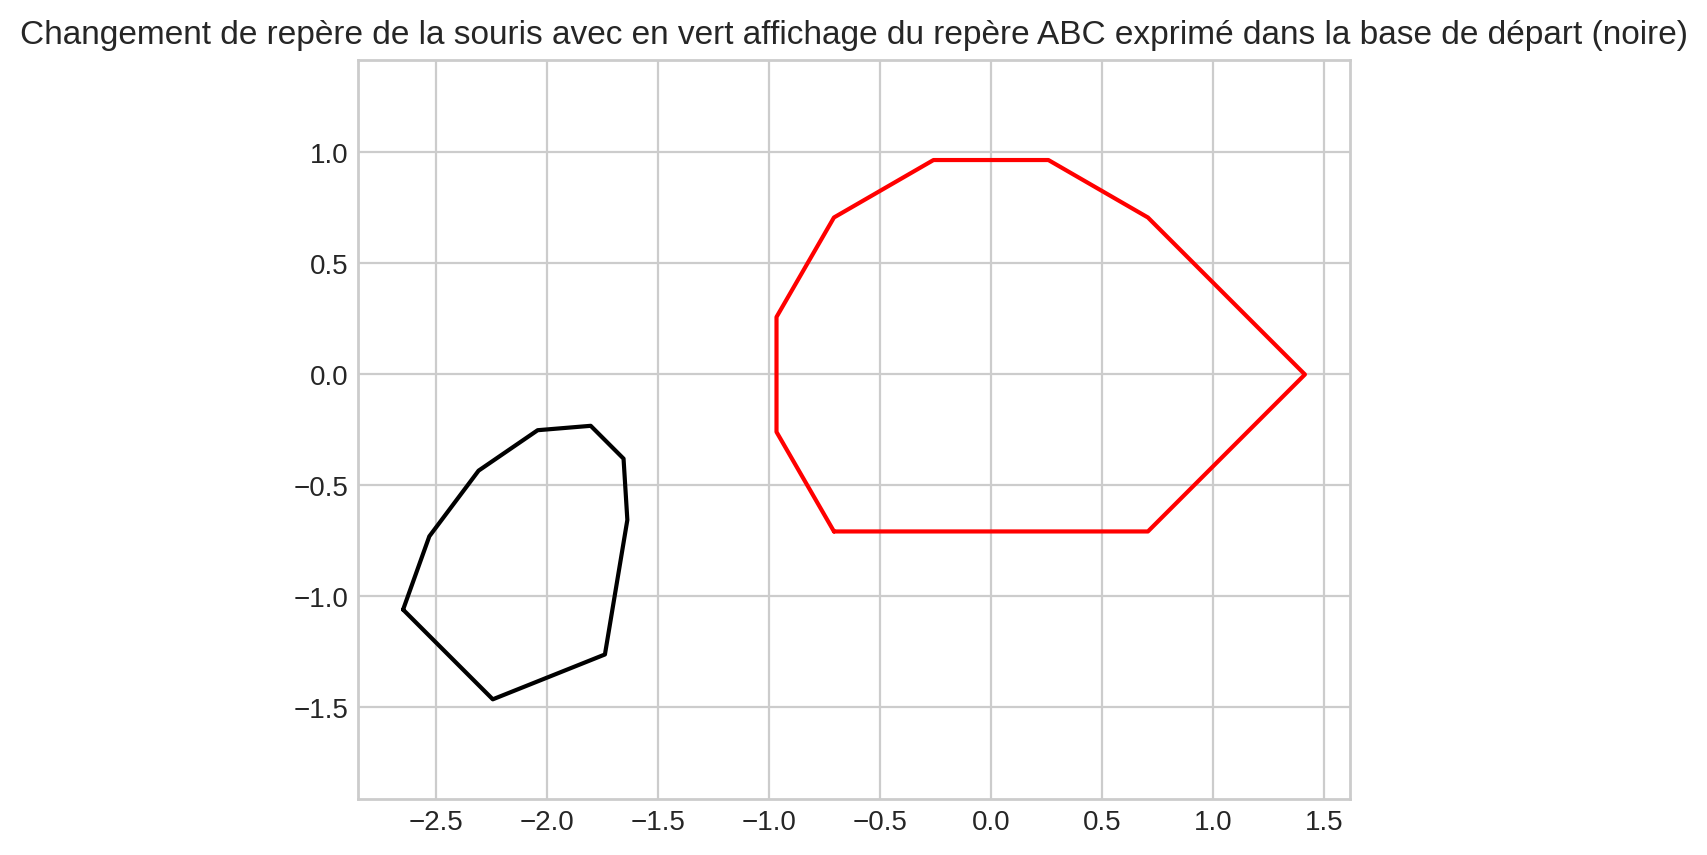

In [11]:
pmouse = lin.inv(P) @ to3D(mouse)

plt.plot(mouse[0,:], mouse[1,:], 'red')
plt.plot(pmouse[0,:], pmouse[1,:], 'black')
plt.axis("equal")
plt.title('Changement de repère de la souris avec en vert affichage du repère ABC exprimé dans la base de départ (noire)');